In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

In [24]:
df = pd.read_excel('D:/Allaus/Data_analysis/check_snow_tot.xlsx', index_col='year')
df.head()

,Arcalis,Arinsal,Grau Roig,Pal,Pas de la Casa,Soldeu,Ransol
year,,,,,,,
1983,85,5042,5822,3001,7327,6940,4003.0
1984,17401,10567,15027,11095,31549,7280,5526.0
1985,10540,5560,9817,5818,11483,2459,2063.0
1986,33095,10934,25234,15170,20397,20885,6395.0
1987,27460,5857,20358,7375,27830,10584,1993.0


In [25]:
df.describe()

,Arcalis,Arinsal,Grau Roig,Pal,Pas de la Casa,Soldeu,Ransol
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20897.225000,9842.400000,16847.575000,8291.725000,19498.500000,10186.200000,3708.527500
std,8987.163171,6350.271158,7621.220815,4401.544006,8756.532755,6781.577077,1993.828788
min,85.000000,1562.000000,5182.000000,1939.000000,5058.000000,102.000000,168.000000
25%,15605.500000,5538.500000,10311.250000,5051.000000,12655.250000,5632.000000,2045.500000
50%,20291.500000,9640.500000,16689.000000,7497.000000,18932.000000,8784.000000,3700.000000
75%,27433.000000,11344.000000,20386.000000,11216.750000,25453.250000,14195.500000,5187.000000
max,37768.000000,35515.000000,32993.000000,20676.000000,37418.000000,27756.000000,7609.000000


In [26]:
stations = df.columns

In [27]:
# Average precipitation

df['AVG'] = df.mean(axis=1)
df.head()

,Arcalis,Arinsal,Grau Roig,Pal,Pas de la Casa,Soldeu,Ransol,AVG
year,,,,,,,,
1983,85,5042,5822,3001,7327,6940,4003.0,4602.857143
1984,17401,10567,15027,11095,31549,7280,5526.0,14063.571429
1985,10540,5560,9817,5818,11483,2459,2063.0,6820.000000
1986,33095,10934,25234,15170,20397,20885,6395.0,18872.857143
1987,27460,5857,20358,7375,27830,10584,1993.0,14493.857143


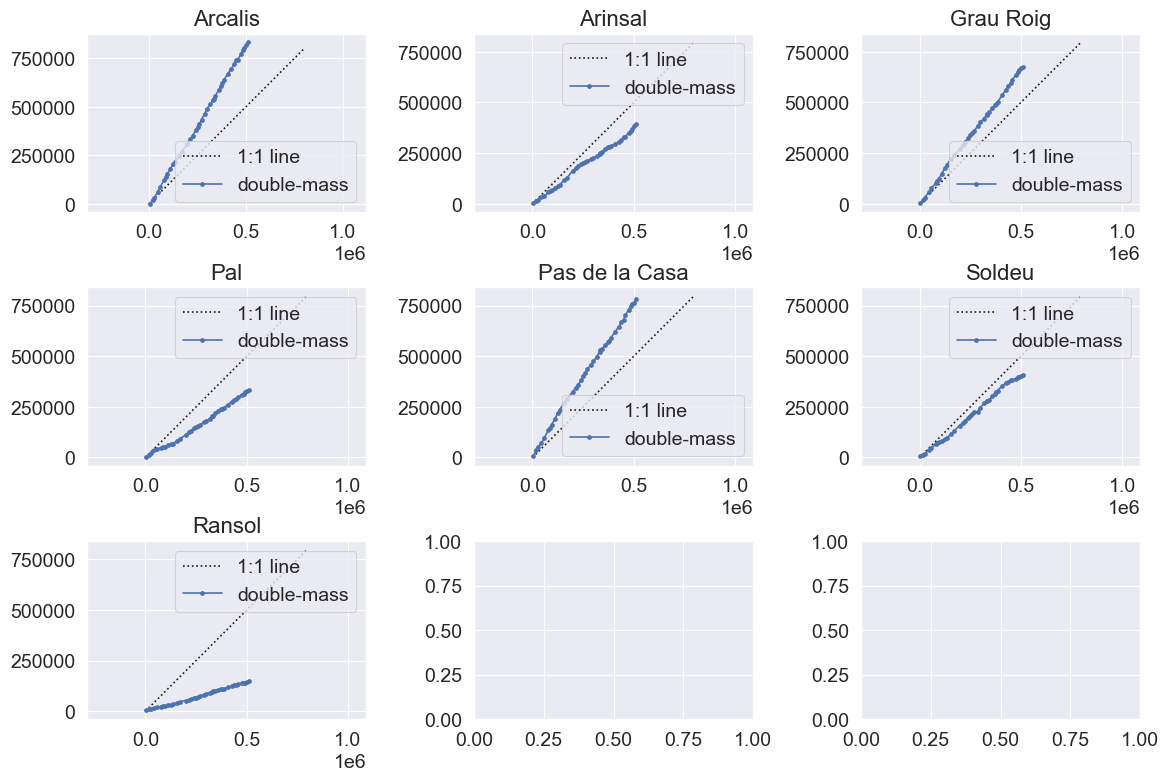

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
fig.tight_layout(pad=2.0)

for (station, ax) in zip(stations, axes.flatten()):
    # line of slope 1 
    ax.plot((0,800000), (0,800000), ':k', label='1:1 line')
    # double mass curve
    ax.plot(df.AVG.cumsum(), df[station].cumsum(), '.-', label='double-mass')
    ax.axis('equal')
    ax.set_title(station, fontsize=16)
    #ax.set_ylabel('Cum. precipitation of individual station')
    #ax.set_xlabel('Cum. precipitation of all stations')
    ax.legend(fontsize=14);

    #'station: ' + 
    
# axes[2,1].axis('off')
# axes[2,2].axis('off');

#ax[1][2].title('Double mass curve for winter stations')
fig.savefig('D:/Allaus/Manuscript/pictures_and_figures/snow tot - heterogeneity.png', dpi=300)
plt.show();

Text(0, 0.5, 'Ransol station')

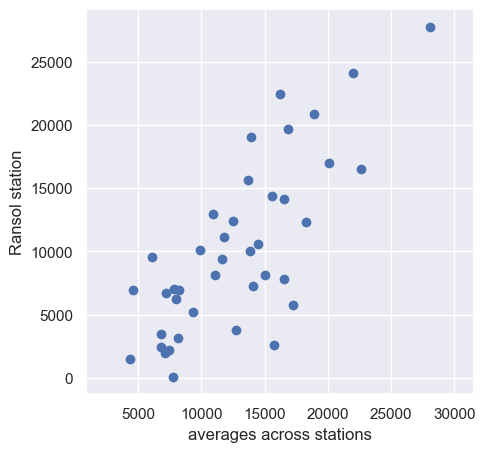

In [11]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.scatter(df.AVG, df['Soldeu'])
plt.xlabel('averages across stations')
plt.ylabel('Ransol station')

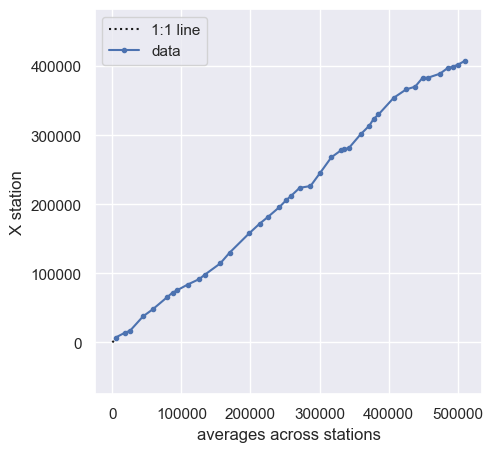

In [12]:
plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot((0, 8000), (0, 8000), ':k', label='1:1 line')
plt.plot(df.AVG.cumsum(), df['Soldeu'].cumsum(), '.-', label='data')
plt.xlabel('averages across stations')
plt.ylabel('X station')
plt.legend()